# Applied Machine Learning, HW2
## Bhaskar Ghosh, bg2625
## Task 2

In [0]:
import csv
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, LeaveOneOut, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression, Lasso, ElasticNet
from sklearn.metrics import confusion_matrix
# import category_encoders as ce
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings

In [0]:
# read the CSV file into a dataframe
housing_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/AMLData/data.csv')

In [4]:
housing_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 2.1
Determine which features are continuous vs categorical. Drop rows without a valid sales
price.

Dropping rows that don't have a valid sales price. If we observe the data there are some rows with price=0.0. Removing those rows from the dataframe.

In [0]:
housing_data.drop(housing_data[housing_data.price == 0.0].index, inplace=True)

In [6]:
housing_data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


The categorical features are given below:
* Street
* City
* Statezip
* Country
* Waterfront (since it can only be 0 or 1)

Continuous features are:
* Price
* Bedrooms
* Bathrooms
* Sqft_living
* Sqft_lot
* Floors
* View
* Condition
* Sqft_above
* Sqft_basement
* yr_built
* yr_renovated


## 2.2
Visualize the univariate distribution of each continuous feature, and the distribution of the
target. Do you notice anything? Is there something that might require special treatment?

In [0]:
prices = housing_data['price']
bedrooms = housing_data['bedrooms']
bathrooms = housing_data['bathrooms']
sqft_living = housing_data['sqft_living']
sqft_lot = housing_data['sqft_lot']
floors = housing_data['floors']
views = housing_data['view']
conditions = housing_data['condition']
sqft_above = housing_data['sqft_above']
sqft_basement = housing_data.sqft_basement
year_built = housing_data.yr_built
year_renovated = housing_data.yr_renovated

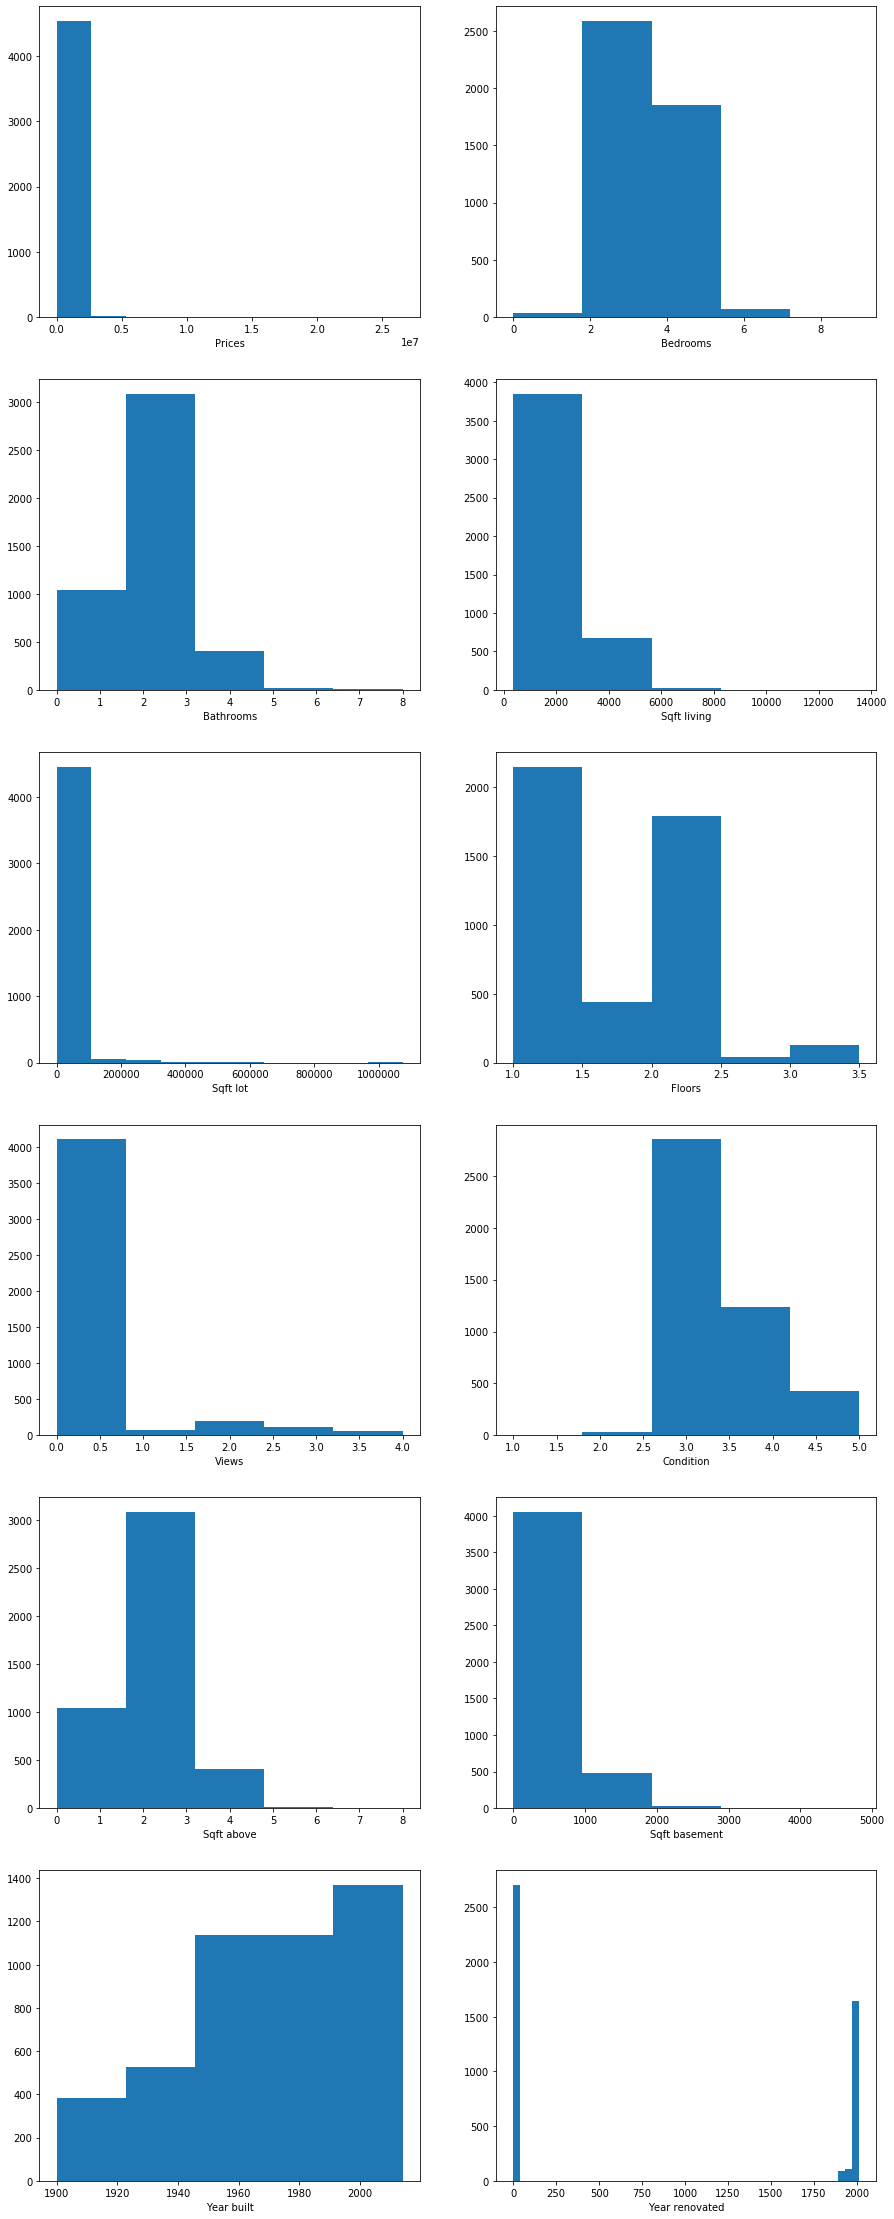

In [9]:
plt.figure(figsize=(15, 40))
ax1 = plt.subplot(6,2,1)
ax1.hist(prices, bins=10)
ax1.set_xlabel('Prices')

ax2 = plt.subplot(6,2,2)
ax2.hist(bedrooms, bins=5)
ax2.set_xlabel('Bedrooms')

ax3 = plt.subplot(6,2,3)
ax3.hist(bathrooms, bins=5)
ax3.set_xlabel('Bathrooms')

ax4 = plt.subplot(6,2,4)
ax4.hist(sqft_living, bins=5)
ax4.set_xlabel('Sqft living')

ax5 = plt.subplot(6,2,5)
ax5.hist(sqft_lot, bins=10)
ax5.set_xlabel('Sqft lot')

ax6 = plt.subplot(6,2,6)
ax6.hist(floors, bins=5)
ax6.set_xlabel('Floors')

ax7 = plt.subplot(6,2,7)
ax7.hist(views, bins=5)
ax7.set_xlabel('Views')

ax8 = plt.subplot(6,2,8)
ax8.hist(conditions, bins=5)
ax8.set_xlabel('Condition')

ax9 = plt.subplot(6,2,9)
ax9.hist(bathrooms, bins=5)
ax9.set_xlabel('Sqft above')

ax10 = plt.subplot(6,2,10)
ax10.hist(sqft_basement, bins=5)
ax10.set_xlabel('Sqft basement')

ax11 = plt.subplot(6,2,11)
ax11.hist(year_built, bins=5)
ax11.set_xlabel('Year built')

ax12 = plt.subplot(6,2,12)
ax12.hist(year_renovated, bins=50)
ax12.set_xlabel('Year renovated')

plt.show()

We need to treat those rows which have 0 values. For example, we have a lot of 0 values in the yr_renovated column. In fact, most of the values in that column are 0, which indicates that either year renovated is not available or the information was not recorded. If we redraw the histogram for yr_renovated after removing the 0 values, we get the following distribution:

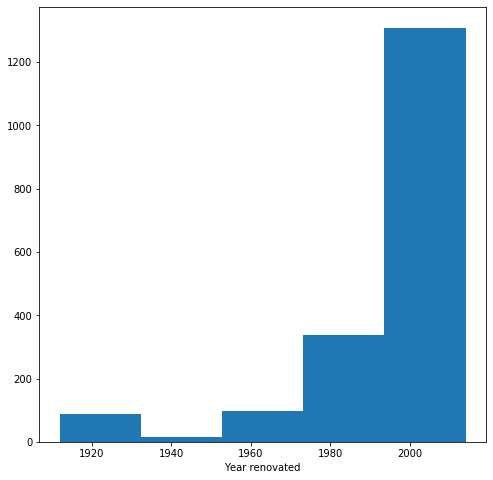

In [10]:
year_renovated = housing_data.drop(housing_data[housing_data.yr_renovated == 0].index, inplace=False).yr_renovated
plt.figure(figsize=(8, 8))
plt.hist(year_renovated, bins=5)
plt.xlabel('Year renovated')
plt.show()

The same goes for sqft_basement. Many of the values are 0 in that column. 
The following figure shows the distribution of sqft_basement for non-zero values.

## 2.3
Visualize the dependency of the target on each continuous feature (2d scatter plot).
The target feature is price. So we shall be plotting other continuous features and observing their influence on price. Scatter plots have been drawn using the original data (with only 0 prices removed).

In [0]:
bedrooms = housing_data['bedrooms']
bathrooms = housing_data['bathrooms']
sqft_living = housing_data['sqft_living']
sqft_lot = housing_data['sqft_lot']
floors = housing_data['floors']
views = housing_data['view']
conditions = housing_data['condition']
sqft_above = housing_data['sqft_above']
sqft_basement = housing_data.sqft_basement
year_built = housing_data.yr_built
year_renovated = housing_data.yr_renovated

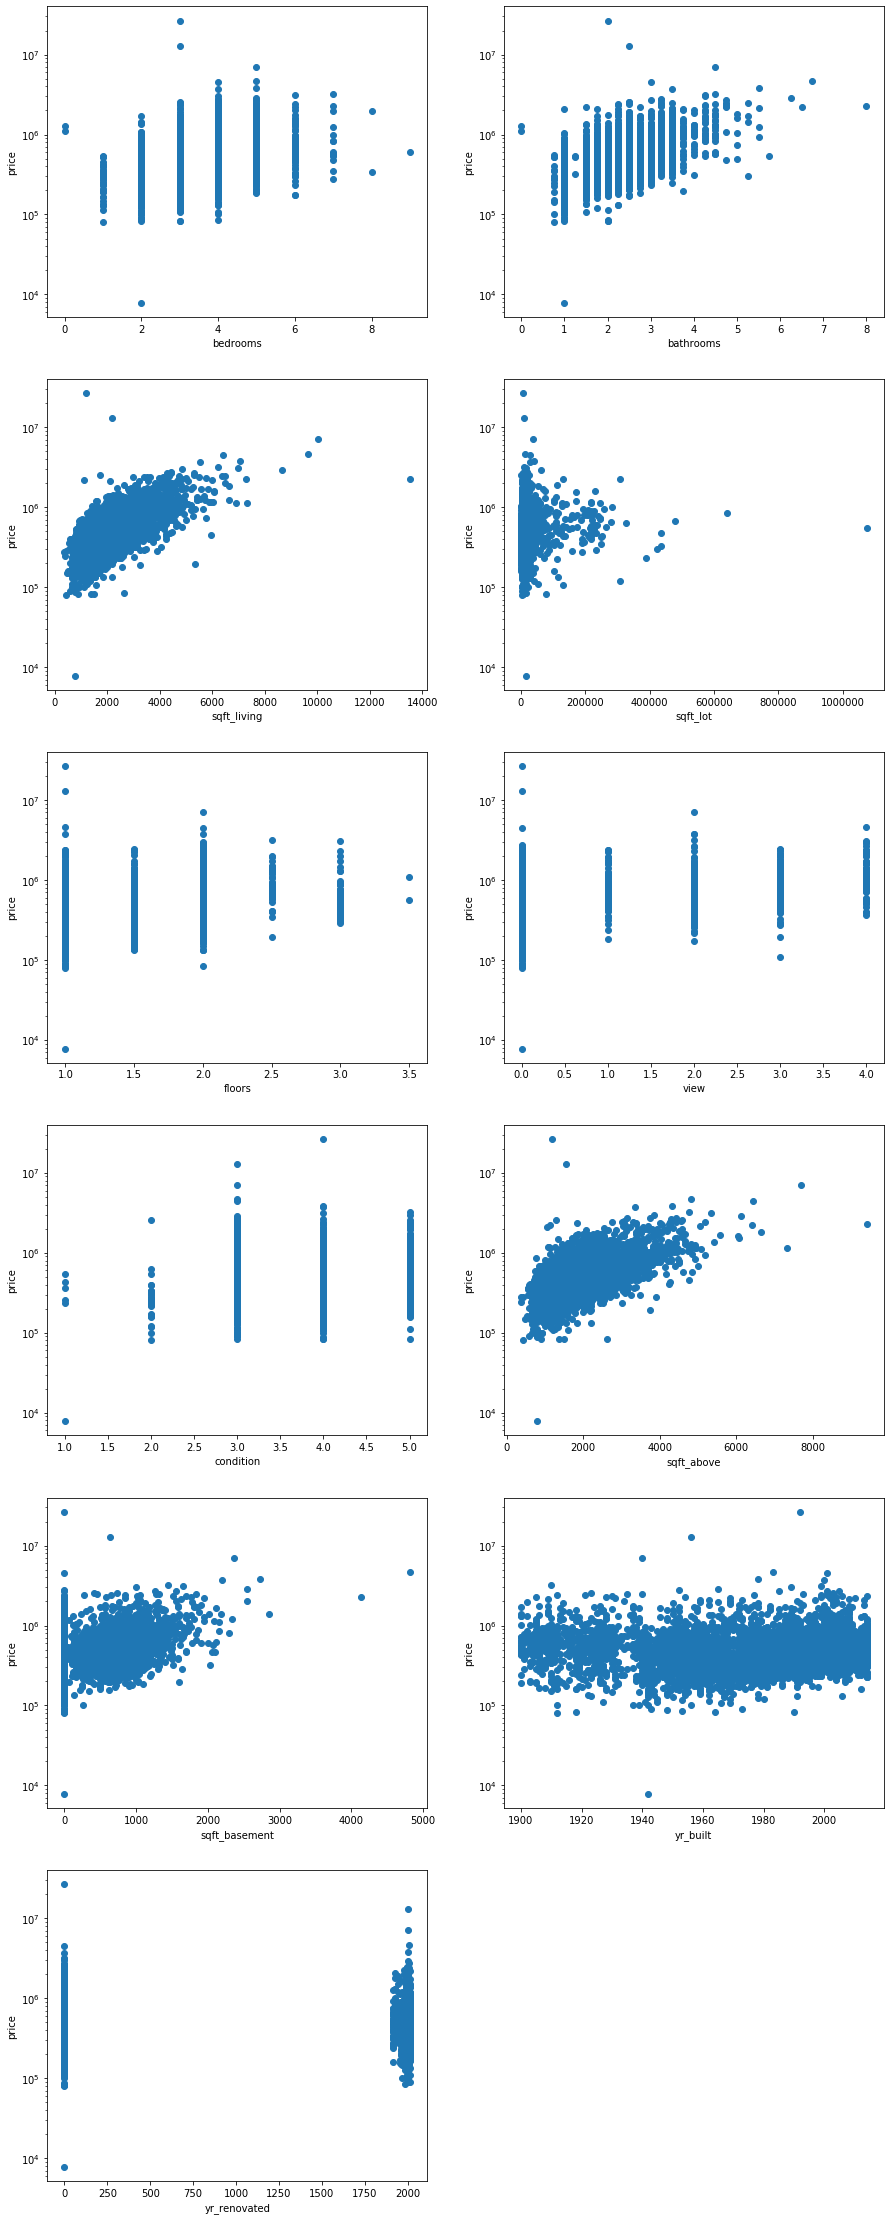

In [12]:
plt.figure(figsize=(15, 40))
ax1 = plt.subplot(6,2,1)
ax1.scatter(bedrooms, prices)
ax1.set_yscale('log')
ax1.set_xlabel('bedrooms')
ax1.set_ylabel('price')

ax2 = plt.subplot(6,2,2)
ax2.scatter(bathrooms, prices)
ax2.set_yscale('log')
ax2.set_xlabel('bathrooms')
ax2.set_ylabel('price')

ax3 = plt.subplot(6,2,3)
ax3.scatter(sqft_living, prices)
ax3.set_yscale('log')
ax3.set_xlabel('sqft_living')
ax3.set_ylabel('price')

ax4 = plt.subplot(6,2,4)
ax4.scatter(sqft_lot, prices)
ax4.set_yscale('log')
ax4.set_xlabel('sqft_lot')
ax4.set_ylabel('price')

ax5 = plt.subplot(6,2,5)
ax5.scatter(floors, prices)
ax5.set_yscale('log')
ax5.set_xlabel('floors')
ax5.set_ylabel('price')

ax6 = plt.subplot(6,2,6)
ax6.scatter(views, prices)
ax6.set_yscale('log')
ax6.set_xlabel('view')
ax6.set_ylabel('price')

ax7 = plt.subplot(6,2,7)
ax7.scatter(conditions, prices)
ax7.set_yscale('log')
ax7.set_xlabel('condition')
ax7.set_ylabel('price')

ax8 = plt.subplot(6,2,8)
ax8.scatter(sqft_above, prices)
ax8.set_yscale('log')
ax8.set_xlabel('sqft_above')
ax8.set_ylabel('price')

ax9 = plt.subplot(6,2,9)
ax9.scatter(sqft_basement, prices)
ax9.set_yscale('log')
ax9.set_xlabel('sqft_basement')
ax9.set_ylabel('price')

ax10 = plt.subplot(6,2,10)
ax10.scatter(year_built, prices)
ax10.set_yscale('log')
ax10.set_xlabel('yr_built')
ax10.set_ylabel('price')

ax11 = plt.subplot(6,2,11)
ax11.scatter(year_renovated, prices)
ax11.set_yscale('log')
ax11.set_xlabel('yr_renovated')
ax11.set_ylabel('price')


plt.show()

## 2.4
Split data in training and test set. Do not use the test-set unless for a final evaluation in 2.5.
Use ColumnTransformer and pipeline to encode categorical variables (your choice of
OneHotEncoder or another one from the categorical_encoder package, or both). Impute missing
values using SimpleImputer. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet
using cross-validation with the default parameters. Does scaling the data (within the pipeline)
with StandardScaler help? Use the preprocessing that works best going forward.

For the yr_renovated column, I looked up the .dat file and found none of the values for the column were originally 0. They were NaN instead. So converting the 0 values in yr_renovated to NaN so that we can apply the SimpleImputer,

In [0]:
housing_data['yr_renovated'] = housing_data['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)

In [15]:
housing_data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,NaN,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA


In [0]:
housing_data[['waterfront']] = housing_data[['waterfront']].astype('str')
categorical_features = ['city', 'statezip', 'country', 'waterfront']
continuous_features = [feature for feature in list(housing_data.columns) if feature not in categorical_features and feature != 'date' and feature != 'price' and feature != 'street']
all_features = continuous_features + categorical_features 

Creating a train test split

In [0]:
# Creating the data frame with all the continuous and categorical features except date and price
price_df = housing_data.iloc[:,1]
features_df = housing_data[all_features]
X_trainval_pipe, X_test_pipe, y_trainval_pipe, y_test_pipe = train_test_split(features_df, price_df, test_size=0.2)

In [18]:
category_check = features_df.dtypes == object
category_check

bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
city              True
statezip          True
country           True
waterfront        True
dtype: bool

### Linear Regression

In [19]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, LinearRegression())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.264


In [20]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, LinearRegression())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.489


Linear Regression is definitely better with scaling

### Ridge regression

In [21]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model_ridge = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Ridge())
model_ridge.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model_ridge, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.267


In [22]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model_ridge = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Ridge())
model_ridge.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model_ridge, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.491


### Lasso

In [23]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Lasso(max_iter=1000, tol=10000.008))
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.258


In [24]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Lasso(max_iter=5000, tol=1000.009))
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.382


### ElasticNet

In [25]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, ElasticNet())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.031


In [26]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, ElasticNet())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.391


Among all the strategies, Ridge regression performed the best with scaling. There is no doubt that scaling improved performance for all the regression techniques.

## 2.5
Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize
the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.

One Hot encode the training data

In [0]:
for feature in features_df.iteritems():
  if feature[0] in categorical_features:
    features_df = pd.get_dummies(features_df)



In [28]:
features_df.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,...,statezip_WA 98070,statezip_WA 98072,statezip_WA 98074,statezip_WA 98075,statezip_WA 98077,statezip_WA 98092,statezip_WA 98102,statezip_WA 98103,statezip_WA 98105,statezip_WA 98106,statezip_WA 98107,statezip_WA 98108,statezip_WA 98109,statezip_WA 98112,statezip_WA 98115,statezip_WA 98116,statezip_WA 98117,statezip_WA 98118,statezip_WA 98119,statezip_WA 98122,statezip_WA 98125,statezip_WA 98126,statezip_WA 98133,statezip_WA 98136,statezip_WA 98144,statezip_WA 98146,statezip_WA 98148,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,country_USA,waterfront_0,waterfront_1
0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


Creating a different split

In [0]:
X_trainval, X_test, y_trainval, y_test = train_test_split(features_df, price_df, test_size=0.3)

#### Using GridSearchCV on Ridge

In [118]:
lr_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), Ridge())
param_grid = {"ridge__alpha" : np.logspace(-3, 3, 13)}
grid_lr = GridSearchCV(lr_pipe, param_grid, cv=5, return_train_score=True)
grid_lr.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lr.best_score_))
print("best parameters: {}".format(grid_lr.best_params_))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.08335e-16): result may not be accurate.
  overwrite_a=True).T


best mean cross-validation score: 0.503
best parameters: {'ridge__alpha': 10.0}


Using the best parameter back to the earlier Ridge model

In [119]:
model_ridge = make_pipeline(SimpleImputer(strategy='most_frequent'), Ridge(alpha=10.0))
model_ridge.fit(X_trainval, y_trainval)
scores = cross_val_score(model_ridge, X_trainval, y_trainval, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.503


#### Using GridSearchCV for Lasso


In [120]:
with warnings.catch_warnings(record=True) as w:
  l_pipe = make_pipeline(SimpleImputer(strategy='mean'), Lasso())
  param_grid = {"lasso__alpha" : range(10, 2000, 50)}
  grid_l = GridSearchCV(l_pipe, param_grid, cv=5, return_train_score=True)
  grid_l.fit(X_trainval, y_trainval)
  print("best mean cross-validation score: {:.3f}".format(grid_l.best_score_))
  print("best parameters: {}".format(grid_l.best_params_))

best mean cross-validation score: 0.493
best parameters: {'lasso__alpha': 310}


In [121]:
model_lasso = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Lasso(alpha=310))
model_lasso.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model_lasso, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.491


#### Elastic Net


In [122]:
with warnings.catch_warnings(record=True) as w:
  en_pipe = make_pipeline(SimpleImputer(strategy='mean'), ElasticNet())
  param_grid = {'elasticnet__alpha': np.logspace(-4, -1, 10),
                'elasticnet__l1_ratio': [0.01, .1, .5, .8, .9, .95, .98, 1]}
  grid_en = GridSearchCV(en_pipe, param_grid, cv=5, return_train_score=True)
  grid_en.fit(X_trainval, y_trainval)
  print("best mean cross-validation score: {:.3f}".format(grid_en.best_score_))
  print("best parameters: {}".format(grid_en.best_params_))

best mean cross-validation score: 0.503
best parameters: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.5}


In [123]:
with warnings.catch_warnings(record=True) as w:
  model_en = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, ElasticNet(alpha=0.021544346900318822, l1_ratio=0.95))
  model_en.fit(X_trainval_pipe, y_trainval_pipe)
  scores = cross_val_score(model_en, X_trainval_pipe, y_trainval_pipe, cv=5)
  print("score: {:.3f}".format(np.mean(scores)))

score: 0.495


In [124]:
print("test-set score: {:.3f}".format(grid_l.score(X_test, y_test)))

test-set score: 0.701


**Scores for all three models improve after tuning.**

#### Visualizing the results

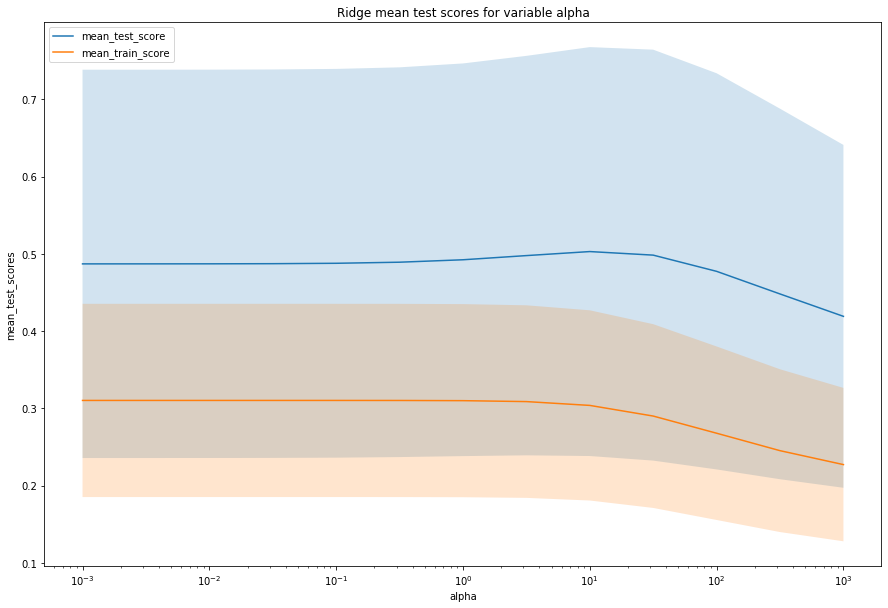

In [125]:
lr_alphavalues = np.logspace(-3, 3, 13)
lr_mean_test_scores = np.asarray(grid_lr.cv_results_['mean_test_score'])
lr_mean_train_scores = np.asarray(grid_lr.cv_results_['mean_train_score'])
std_test = np.asarray(grid_lr.cv_results_['std_test_score'])
std_train = np.asarray(grid_lr.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(lr_alphavalues, lr_mean_test_scores, label='mean_test_score')
ax.plot(lr_alphavalues, lr_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(lr_alphavalues, lr_mean_test_scores + std_test, lr_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(lr_alphavalues, lr_mean_train_scores+std_train, lr_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='alpha', ylabel='mean_test_scores',
       title='Ridge mean test scores for variable alpha')
ax.legend(loc='upper left')

plt.show()

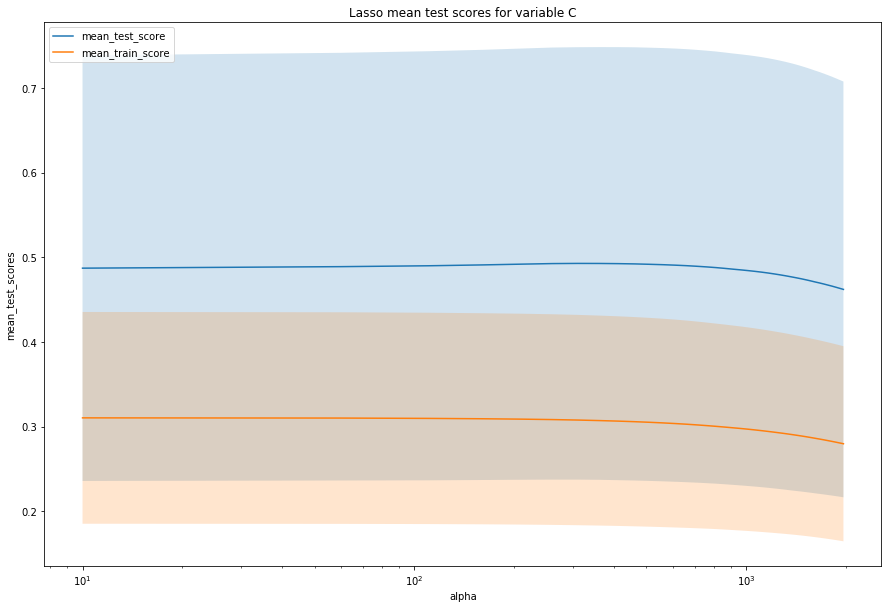

In [126]:
l_alphavalues = range(10, 2000, 50)
l_mean_test_scores = np.asarray(grid_l.cv_results_['mean_test_score'])
l_mean_train_scores = np.asarray(grid_l.cv_results_['mean_train_score'])
std_test = np.asarray(grid_l.cv_results_['std_test_score'])
std_train = np.asarray(grid_l.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(l_alphavalues, l_mean_test_scores, label='mean_test_score')
ax.plot(l_alphavalues, l_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(l_alphavalues, l_mean_test_scores + std_test, l_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(l_alphavalues, l_mean_train_scores+std_train, l_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='alpha', ylabel='mean_test_scores',
       title='Lasso mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

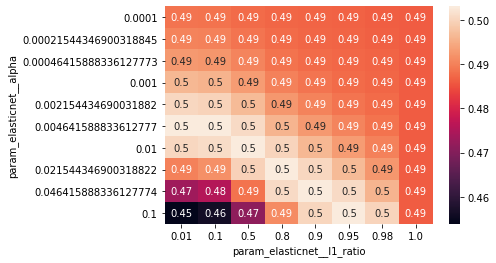

In [127]:
res = pd.pivot_table(pd.DataFrame(grid_en.cv_results_),
    values='mean_test_score', index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')
sns.heatmap(res, annot=True)
plt.show()

## 2.6
Visualizing the most important coefficients from the above models

#### Starting with Ridge regression

In [0]:
categorical_fe = housing_data[categorical_features]
enc = OneHotEncoder()
enc.fit_transform(categorical_fe)
encoded_categories = list(enc.get_feature_names(categorical_features))
all_features = continuous_features + encoded_categories

In [0]:
coeffs = model_ridge.steps[1][1].coef_

In [0]:
coeff_tuples = []
for index, coeff in enumerate(coeffs):
  coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])

In [0]:
best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
# map indices to column names
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

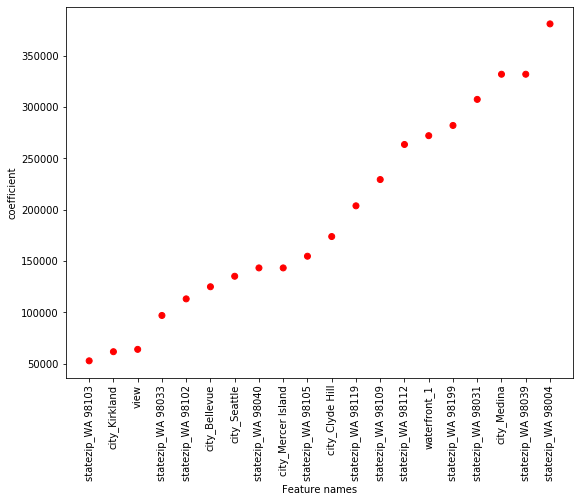

In [132]:
coefficient_names = [tup[1] for tup in best_coeff]

plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coefficient_names, c=np.sign(coefficient_names), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()

### Visualization for Lasso

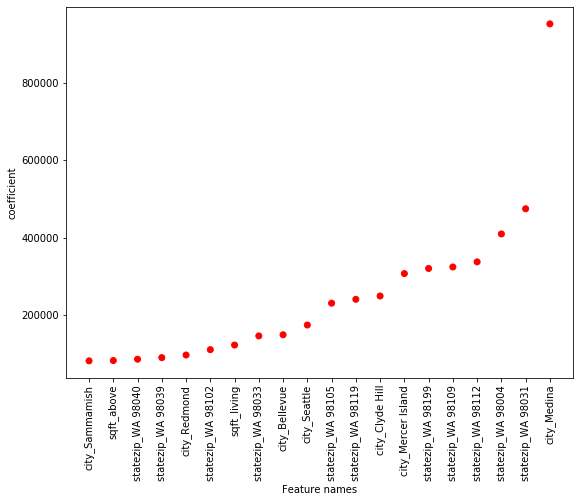

In [133]:
coeff_l = model_lasso.steps[2][1].coef_
coeff_tuples = []
for index, coeff in enumerate(coeff_l):
  coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])

best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
# map indices to column names
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

coefficient_names = [tup[1] for tup in best_coeff]

plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coefficient_names, c=np.sign(coefficient_names), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()

### Visualization for Elastic Net

In [0]:
coeff_en = model_en.steps[2][1].coef_

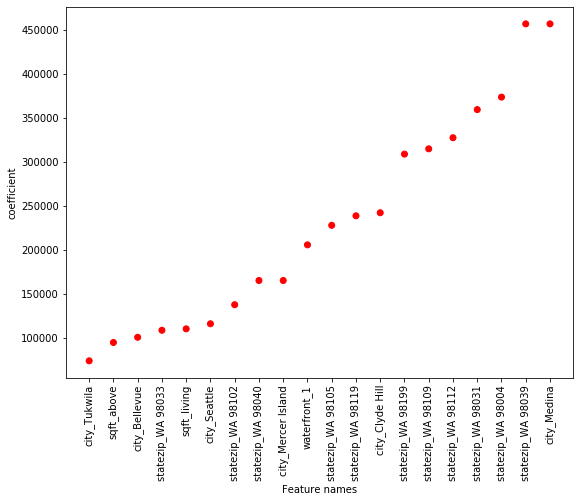

In [135]:
coeff_tuples = []
for index, coeff in enumerate(coeff_en):
  coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])

best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
# map indices to column names
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

coefficient_names = [tup[1] for tup in best_coeff]

plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coefficient_names, c=np.sign(coefficient_names), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()

Ridge and Elastic Net agree on the highest coeffiecient. In general coeffcient values were highest for zip codes. Medina, Bellevue, Seattle and Kirkland appeared on all the three graphs. According to Ridge and Elsatic Net, having a waterfront was important, but not so for Lasso. Features related to sqft were also highlighted as important.